## **Exercise: Ensemble Model Boosting**

### **Build a machine learning model to predict which customers will leave the bank!**

The goal is to determine whether a customer will churn (stop using the bank's services).

**Dataset overview:**

- It contains 10,000 observations and 12 variables.
- Independent variables provide information about customers.
- The dependent variable indicates customer abandonment.

**Features:**

- Surname: Customer's last name
- CreditScore: Credit score
- Geography: Country (Germany/ France/ Spain)
- Gender: Gender (Female/ Male)
- Age: Age
- Tenure: Number of years as a customer
- Balance: Account balance
- NumOfProducts: Number of bank products used
- HasCrCard: Credit card status (0 = No, 1 = Yes)
- IsActiveMember: Active membership status (0 = No, 1 = Yes)
- EstimatedSalary: Estimated salary
- Exited: Churn status (0 = No, 1 = Yes)

**Data Exploration:**<br>
First, I'd start by loading the dataset and taking a quick look at its structure using methods like head() and info(). This will give me an initial understanding of the features and their data types. Then, I'd check for missing values and look at summary statistics to get an overview of the numerical features.<br>

Next, I'd explore the distribution of the target variable 'Exited' to understand the churn rate in the dataset. This will help me gauge the class imbalance and decide on appropriate strategies during modeling. <br>

After that, I'd visualize the relationships between features and the target variable using techniques like histograms, bar plots, and correlation matrices. This exploration will provide insights into which features might be important predictors of churn.<br>

**Data Cleaning and Preprocessing:**<br>
For data cleaning, I'd handle missing values, if any, using techniques like imputation or deletion depending on the extent of missingness and the nature of the feature.<br>
<br>
Next, I'd encode categorical variables using methods like one-hot encoding or label encoding to prepare them for modeling. Additionally, I might scale numerical features to ensure that they have similar ranges.<br>
<br>
I'd also handle any outliers in the dataset <br>

**Metric Selection:**<br>
Since this is a binary classification problem with imbalanced classes (churned vs. not churned customers), accuracy alone might not be an appropriate metric. In this model i will use f2 score <br>
<br>
**Modeling:**<br>
I'd start by splitting the dataset into training and testing sets to evaluate the models' performance on unseen data. Then, I'd train the following models: logistic regression, knn, decision tree, random forest, adaboost, gradient boost<br>
<br>
During modeling, I'd employ techniques like cross-validation to ensure robust evaluation of the models' performance and avoid overfitting.<br>
<br>

**Model Selection and Hyperparameter Tuning:**<br>

For the selected model, I'd conduct hyperparameter tuning using techniques like grid search or randomized search to optimize its performance further.<br>
<br>

**Comparison:**<br>
Finally, I'd compare the performance of the selected model before and after hyperparameter tuning to assess the improvement in its predictive capabilities. This comparison will help me determine the effectiveness of the tuning process in enhancing the model's performance.

## **Business Problem**

The aim of this project is to determine whether a customer will churn (stop using the bank's services).

FP: 

We predict that the customer will churn (action --> we provide a promotion costing $100), whereas in reality, they do not churn.


FN: 

We predict that the customer will not churn (action --> we do not pay attention to this customer), whereas in reality, they churn (resulting in a loss of customer worth $500).


Cost of FP: $100

Cost of FN: $500

Since the cost of FN is higher, the metric used will be the f2 score

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# polynomial
from sklearn.preprocessing import PolynomialFeatures

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble various
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor

# ensemble similar 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor,GradientBoostingClassifier
# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

## **1. Load Dataset**

In [2]:
df =pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **2. EDA**

### **2.1 Data Understanding**

In [3]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### **2.2 Data Understanding & Handling Outliers**

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Balance**<br>
It was found that there are 3,617 customers with a balance of 0. To address this, I decided to delete the data as it potentially indicates dormant accounts.

In [8]:
df[df['Balance']==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [9]:
# delete data that df['Balance'] is zero
df=df[~(df['Balance']==0)]

**BOXPLOT**

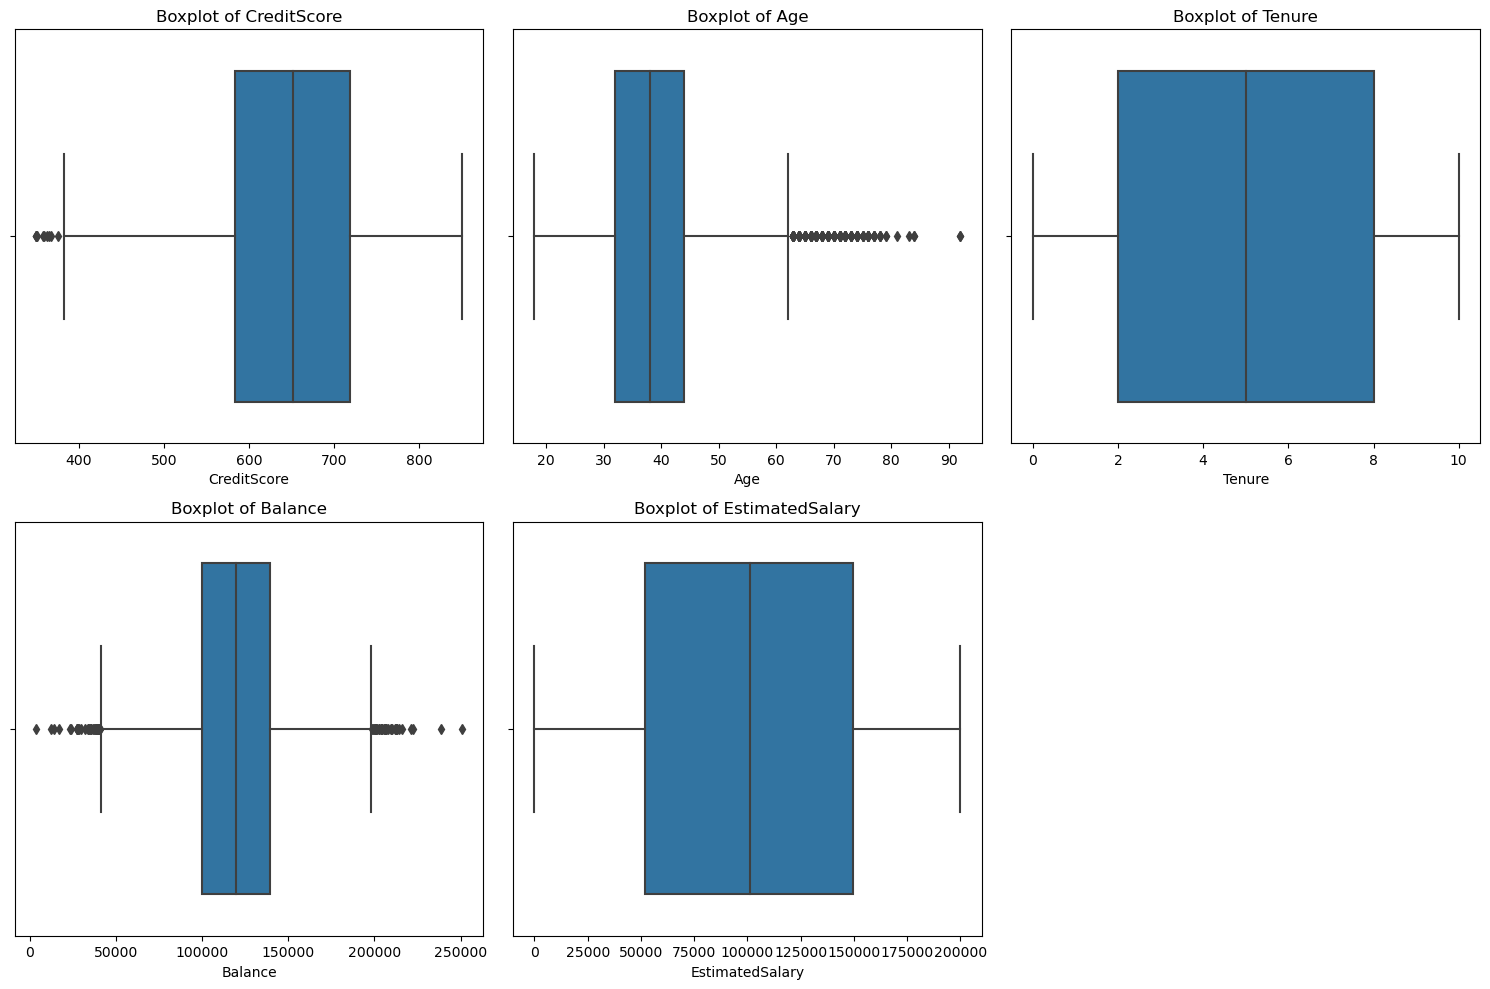

In [10]:
# Select integer-type columns
test_boxplot = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_boxplot.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot boxplot
for idx, column in enumerate(test_boxplot.columns):
    row = idx // num_cols
    col = idx % num_cols
    sns.boxplot(x=test_boxplot[column], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_xlabel(column)

# Remove any unused subplots
for idx in range(len(test_boxplot.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Delete outlier 
df = df[~(
    (df['CreditScore']<350) |
    (df['Age']>65) 
)]

In [12]:
df.shape

(6224, 11)

### **2.3 Analyze Relationships between Numeric Features**

In [13]:
kategorik = []
numerik = []
for i in df.columns :
    if df[i].dtype == 'object':
        kategorik.append(i)
    else : 
        numerik.append(i)


In [14]:
df_kategorik = df[kategorik]
df_numerik = df[numerik]

In [15]:
df_numerik

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
4,850,43,2,125510.82,1,1,1,79084.10,0
5,645,44,8,113755.78,2,1,0,149756.71,1
7,376,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...
9991,597,53,4,88381.21,1,1,0,69384.71,1
9993,644,28,7,155060.41,1,1,0,29179.52,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9998,772,42,3,75075.31,2,1,0,92888.52,1


**HISTOGRAM**

In [16]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

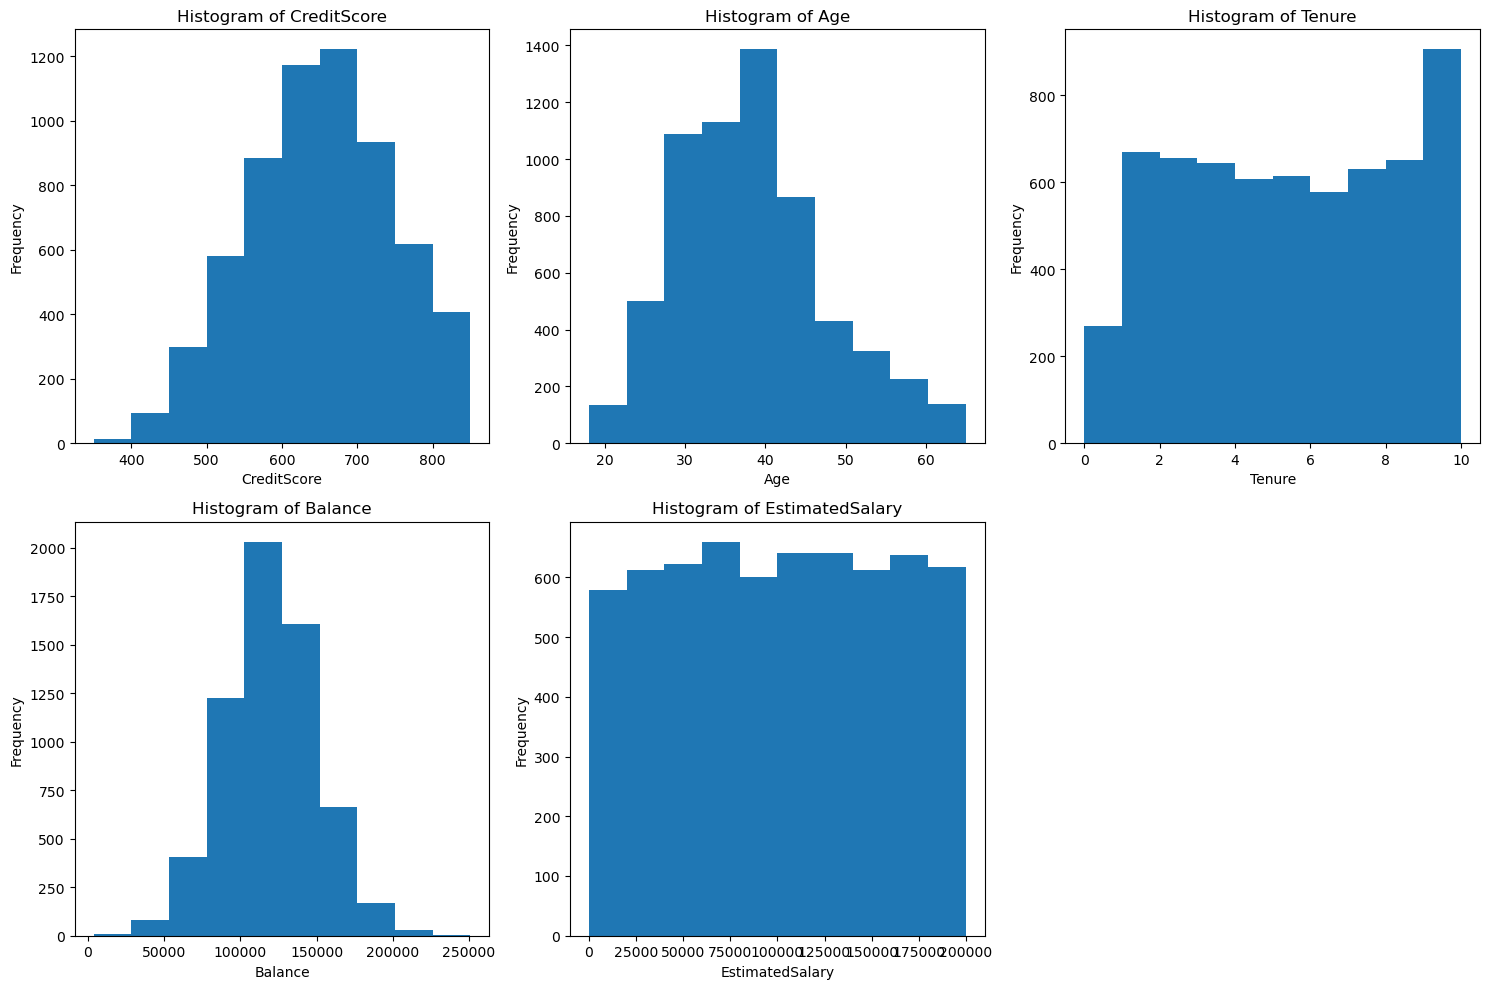

In [17]:
# Select integer-type columns
test_histogram = df_numerik[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]
# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_histogram.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot histogram
for idx, column in enumerate(test_histogram.columns):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].hist(test_histogram[column], bins=10)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(len(test_histogram.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [18]:
df['Balance'].skew()

0.031107101697314395

Most of the data are not normally distributed, except for df['Balance'], which has a skew value of 0.03, indicating that it is quite normal.

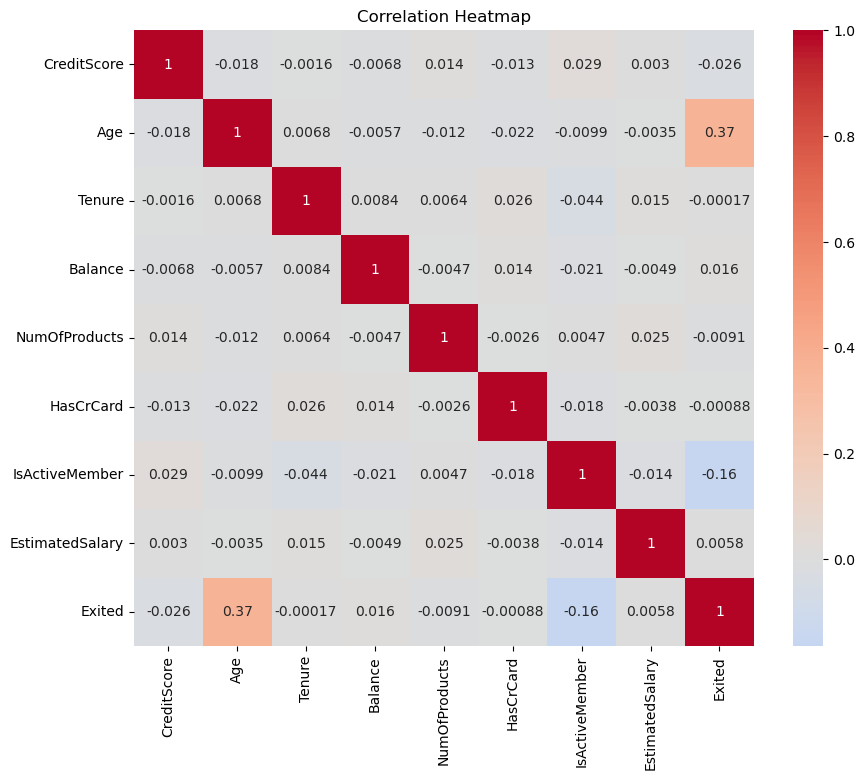

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_numerik.corr(method='spearman'),
            annot=True,   # Show correlation values on the heatmap
            cmap='coolwarm',   # Color map
            center=0)   # Mask to hide values with correlation less than 0.5

plt.title('Correlation Heatmap')
plt.show()

The numeric features do not have a strong correlation.

### **2.4 Analyze Relationship between Numeric and Categoric Features**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6224 non-null   int64  
 1   Geography        6224 non-null   object 
 2   Gender           6224 non-null   object 
 3   Age              6224 non-null   int64  
 4   Tenure           6224 non-null   int64  
 5   Balance          6224 non-null   float64
 6   NumOfProducts    6224 non-null   int64  
 7   HasCrCard        6224 non-null   int64  
 8   IsActiveMember   6224 non-null   int64  
 9   EstimatedSalary  6224 non-null   float64
 10  Exited           6224 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 583.5+ KB


In [21]:
df_kategorik.head()

,Geography,Gender
1,Spain,Female
2,France,Female
4,Spain,Female
5,Spain,Male
7,Germany,Female


In [22]:
for i in df_kategorik.columns :
    print(i)
    print(df[i].unique())
    print('-------------------------')

Geography
['Spain' 'France' 'Germany']
-------------------------
Gender
['Female' 'Male']
-------------------------


Text(0.5, 1.0, 'Comparison Churn by Gender')

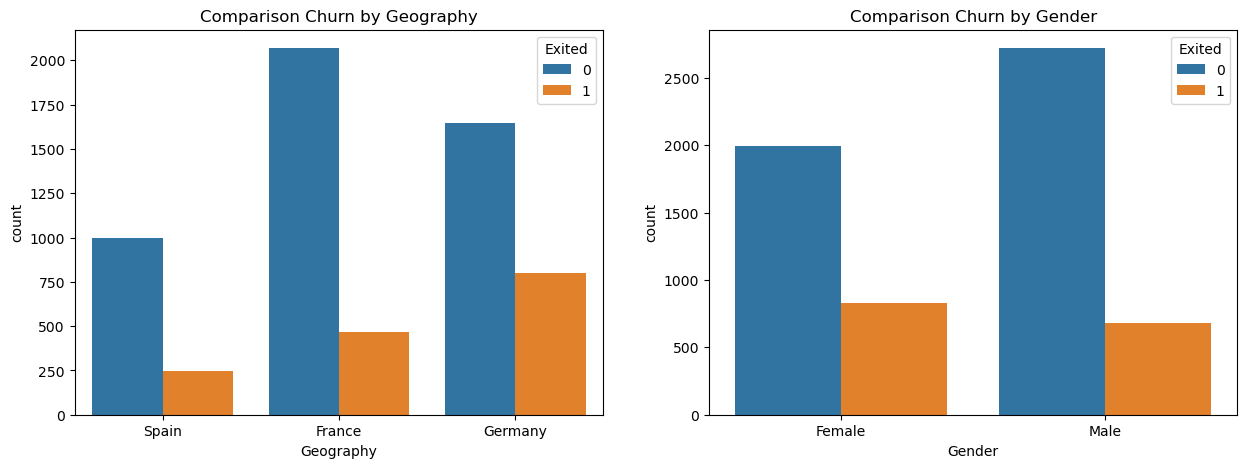

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Geography',hue='Exited')
plt.title('Comparison Churn by Geography')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'Gender',hue='Exited')
plt.title('Comparison Churn by Gender')

Germany has a high probability of customers churning. Additionally, females tend to have a higher likelihood of churning.

In [24]:
df_numerik.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
4,850,43,2,125510.82,1,1,1,79084.10,0
5,645,44,8,113755.78,2,1,0,149756.71,1
7,376,29,4,115046.74,4,1,0,119346.88,1


Text(0.5, 1.0, 'Scatterplot of CreditScore and EstimatedSalary ')

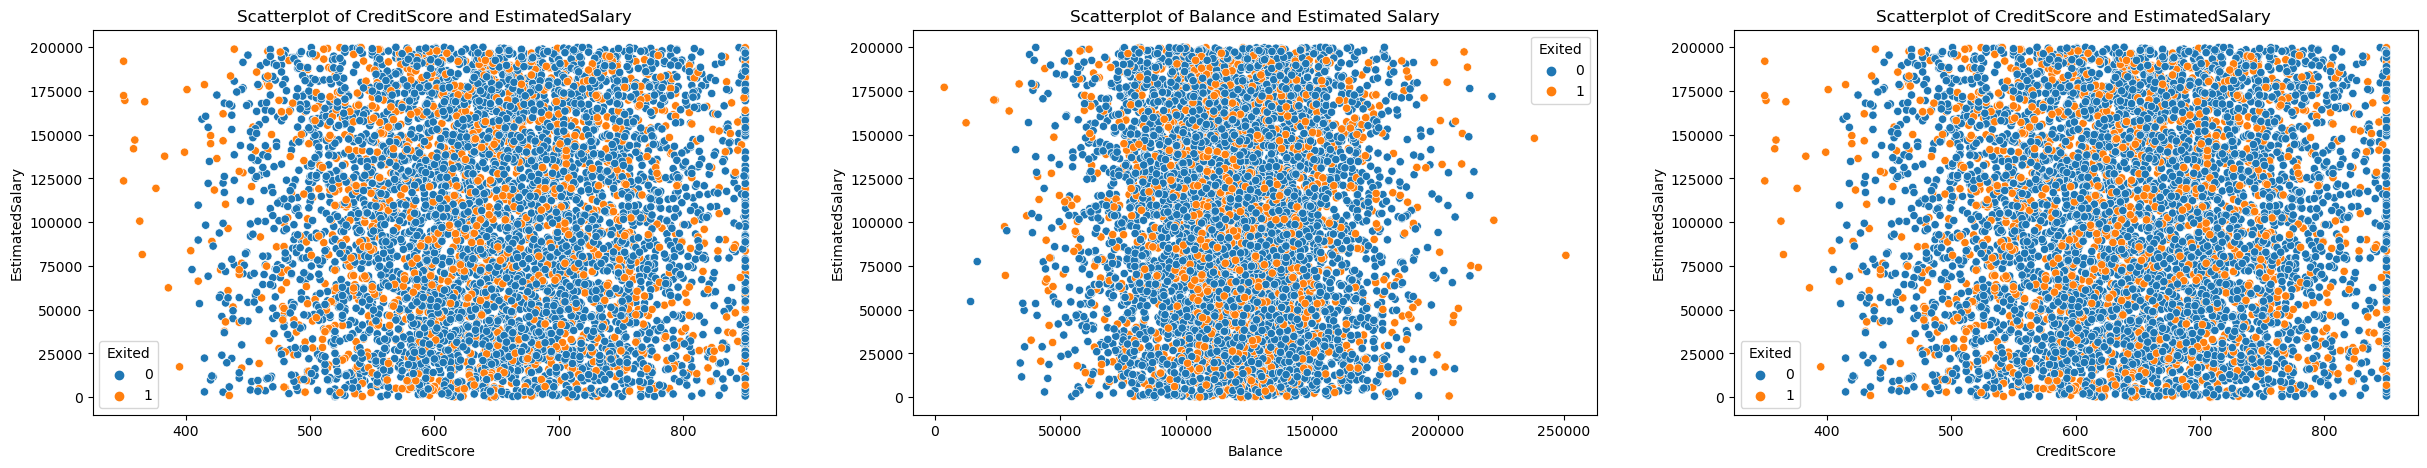

In [25]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='CreditScore',y='EstimatedSalary', hue = 'Exited')
plt.title('Scatterplot of CreditScore and EstimatedSalary')

plt.subplot(1,3,2)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited')
plt.title('Scatterplot of Balance and Estimated Salary')

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='CreditScore', y = 'EstimatedSalary', hue = 'Exited')
plt.title('Scatterplot of CreditScore and EstimatedSalary ')

Text(0.5, 1.0, 'Comparison Churn by IsActiveMember')

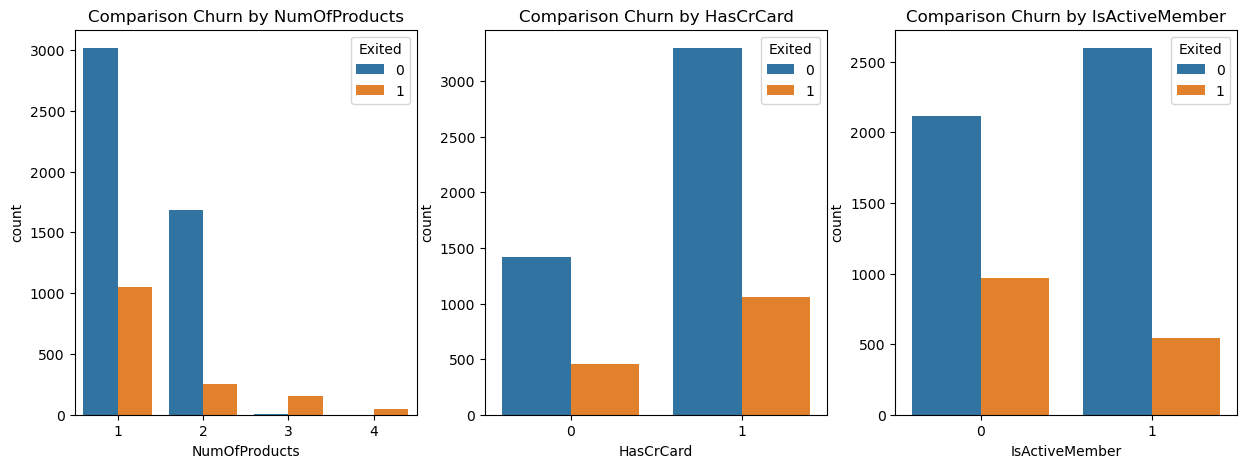

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(data = df, x = 'NumOfProducts',hue='Exited')
plt.title('Comparison Churn by NumOfProducts')

plt.subplot(1,3,2)
sns.countplot(data = df, x = 'HasCrCard',hue='Exited')
plt.title('Comparison Churn by HasCrCard')

plt.subplot(1,3,3)
sns.countplot(data = df, x = 'IsActiveMember',hue='Exited')
plt.title('Comparison Churn by IsActiveMember')

From the countplot above, we gather some insights:

1. Customers who only have one product are more likely to churn, while those with two products are relatively more loyal. However, customers with more than two products are more likely to churn.
2. Customers who have a credit card are more likely to churn.
3. Active members are more likely to stay than inactive members.

Based on the various charts, the company should consider targeting:
1. Customers from Germany.
2. Customers without a credit card.
3. Encouraging them to purchase additional products.
4. Encouraging them to be more active.

## **3. Define X and y**

In [27]:
X = df.drop(columns='Exited')
y = df['Exited']

## **4. Train, test and split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify= y, test_size=0.3,random_state=0)

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88


In [30]:
df['Tenure'].unique()

array([ 1,  8,  2,  4,  6,  3,  0,  7,  9,  5, 10], dtype=int64)

In [31]:
y.value_counts() /len(X)*100

Exited
0    75.739075
1    24.260925
Name: count, dtype: float64

There will be imbalanced treatment

## **5. Data Preprocessing**

OneHotEncoding -> 'Geography','Gender' <br>
RobustScale -> 'CreditScore','Age','Balance','EstimatedSalary', 'Tenure'

In [32]:
transformer = ColumnTransformer([
    ('oneHot',OneHotEncoder(drop='first'),['Geography','Gender']),
    ('robustScale',RobustScaler(),['CreditScore','Age','Balance','EstimatedSalary','Tenure'])
], remainder='passthrough')

## **6. Cross Validation**

In [33]:
# define model
logreg = LogisticRegression(random_state = 0)
tree =DecisionTreeClassifier(random_state = 0)
knn =KNeighborsClassifier()

In [34]:
# define voting 
voting = VotingClassifier(estimators = [('clf1',logreg),
                              ('clfl2', tree),
                              ('clfl3',knn)])

# define stacking 
stacking = StackingClassifier (estimators =[('clf1',logreg),
                                            ('clfl2', tree),
                                            ('clfl3',knn)], #base learner
                                final_estimator = logreg)   #meta learner

In [35]:
# define bagging 
bagging = BaggingClassifier(random_state=0, estimator = KNeighborsClassifier())

# define random forest
rf = RandomForestClassifier(random_state=0)

# define adaboost 
adaboost = AdaBoostClassifier(random_state=0)

# define gradient boost
gboost = GradientBoostingClassifier(random_state=0)

In [36]:
from sklearn.metrics import make_scorer, fbeta_score

# Define a custom scorer using fbeta_score with beta=2
f2_scorer = make_scorer(fbeta_score, beta=2)

# Cross Validation 
models = [logreg,knn,tree,voting,stacking, bagging, rf, adaboost, gboost]
cv_all = []
cv_mean =[]
cv_std =[]

for i in models:
    # pipe untuk processing and modelling
    pipe_model = Pipeline([('preprocessing', transformer),
                           ('modeling', i)])

    # cross validation with f2 score
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        n_jobs=-1,
        scoring=f2_scorer  # Use F2 score
    )

    cv_all.append(crossval)
    cv_mean.append(crossval.mean())
    cv_std.append(crossval.std())


In [37]:
df_cv = pd.DataFrame()
df_cv['algo'] = models
df_cv['all_score'] = cv_all
df_cv['mean'] = cv_mean
df_cv['std']= cv_std

df_cv

,algo,all_score,mean,std
0,LogisticRegression(random_state=0),"[0.28101802757158006, 0.36082474226804123, 0.3...",0.352395,0.037657
1,KNeighborsClassifier(),"[0.4230377166156983, 0.4238143289606458, 0.455...",0.438037,0.012675
2,DecisionTreeClassifier(random_state=0),"[0.5204460966542751, 0.5045871559633027, 0.497...",0.510204,0.010120
3,"VotingClassifier(estimators=[('clf1', Logistic...","[0.39501039501039503, 0.4170905391658189, 0.43...",0.425530,0.018280
4,"StackingClassifier(estimators=[('clf1', Logist...","[0.41709577754891863, 0.44534412955465585, 0.4...",0.443862,0.014626
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.39690721649484534, 0.4026503567787971, 0.42...",0.423444,0.021962
6,RandomForestClassifier(random_state=0),"[0.49019607843137253, 0.4414784394250513, 0.49...",0.492089,0.027527
7,AdaBoostClassifier(random_state=0),"[0.481064483111566, 0.4467005076142132, 0.5364...",0.495195,0.030167
8,GradientBoostingClassifier(random_state=0),"[0.4808686659772492, 0.4684317718940937, 0.552...",0.515575,0.034612


I will use GradientBoostingClassifier()

## **7. Hyperparameter Tuning**

In [38]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.pipeline import Pipeline

In [39]:
# Define ROS
ros = RandomOverSampler()

# Define RUS
rus = RandomUnderSampler()

# Define Nearmiss
near = NearMiss()

# Define Smote
smote = SMOTE()

In [40]:

# define model
model = GradientBoostingClassifier(random_state=0)

# hyperparam
hyperparam = {'resampling' : [ros,rus,smote,near, None], 
              'modeling__n_estimators': range(50, 150, 20),
              'modeling__max_features': range(2, 10, 1),
              'modeling__max_depth': range(2, 30, 1),
              'modeling__min_samples_leaf': range(20, 100, 1),
              'modeling__min_samples_split': range(2, 100, 1),
              'modeling__min_impurity_decrease': range(0, 10, 1)}

# pipeline 
pipe_model = Pipeline([
    ('resampling', rus), 
    ('preprocessing',transformer),
    ('modeling', model )
    ])


# hyperparameter space 
# hyperparam_space = {
#     'modeling__C':[100, 10, 1, 0.1, 0.01, 0.001],
#     'modeling__solver':['liblinear','newton-cg']
# }

# Stratified cross validation
# skf = StratifiedKFold(n_splits = 5)

# Tuning 
randomsearch_rf = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam,
    cv = 5,
    scoring = f2_scorer,
    n_jobs= -1,
    n_iter=500,
    random_state = 0
)

In [41]:
randomsearch_rf.fit(X_train, y_train)

c:\Users\Intania\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1190 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
238 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Intania\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Intania\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Intania\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 322, in fit
    Xt, yt = se

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling',
                                              RandomUnderSampler()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('oneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Geography',
                                                                                'Gender']),
                                                                              ('robustScale',
                                                                               RobustScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Balance',
                                                                                'EstimatedSalary',
                                                                                'Tenure'])])),
                                             ('modeling',
                                              GradientBoostingClassifi...
                                        'modeling__max_features': range(2, 10),
                                        'modeling__min_impurity_decrease': range(0, 10),
                                        'modeling__min_samples_leaf': range(20, 100),
                                        'modeling__min_samples_split': range(2, 100),
                                        'modeling__n_estimators': range(50, 150, 20),
                                        'resampling': [RandomOverSampler(),
                                                       RandomUnderSampler(),
                                                       SMOTE(), NearMiss()]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [42]:
randomsearch_rf.best_score_

0.6703877971867788

In [43]:
pd.DataFrame(randomsearch_rf.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__min_impurity_decrease,param_modeling__max_features,param_modeling__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
227,0.272241,0.043940,0.021192,0.003490,RandomUnderSampler(),50,24,96,1,4,22,"{'resampling': RandomUnderSampler(), 'modeling...",0.679278,0.631443,0.685234,0.682990,0.672994,0.670388,0.019908,1
155,0.593491,0.040849,0.026403,0.005209,RandomUnderSampler(),50,39,99,0,8,29,"{'resampling': RandomUnderSampler(), 'modeling...",0.688190,0.637555,0.688438,0.655447,0.682218,0.670370,0.020415,2
357,1.085283,0.032477,0.021878,0.007654,RandomOverSampler(),130,63,54,2,7,12,"{'resampling': RandomOverSampler(), 'modeling_...",0.683837,0.633929,0.690583,0.673250,0.667870,0.669894,0.019653,3
24,0.558046,0.016416,0.023514,0.005602,RandomUnderSampler(),90,51,92,0,2,9,"{'resampling': RandomUnderSampler(), 'modeling...",0.695164,0.628272,0.689655,0.672743,0.657439,0.668655,0.024154,4
279,1.022756,0.007669,0.025005,0.007657,RandomUnderSampler(),110,15,92,0,8,22,"{'resampling': RandomUnderSampler(), 'modeling...",0.702200,0.609966,0.691489,0.666957,0.670732,0.668269,0.031930,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.010945,0.006246,0.000000,0.000000,NearMiss(),110,12,98,5,8,11,"{'resampling': NearMiss(), 'modeling__n_estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,263
290,0.012501,0.006250,0.000000,0.000000,NearMiss(),110,95,94,2,8,10,"{'resampling': NearMiss(), 'modeling__n_estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,263
98,0.013327,0.011585,0.000000,0.000000,SMOTE(),70,2,69,5,4,24,"{'resampling': SMOTE(), 'modeling__n_estimator...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,263
296,0.009376,0.007655,0.000000,0.000000,NearMiss(),110,21,36,7,7,21,"{'resampling': NearMiss(), 'modeling__n_estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,263


## **8. Predict to Test Set**

In [44]:
# GradientBoosting
gboost = GradientBoostingClassifier(random_state=0)

pipe_model = Pipeline([ 
    ('preprocessing',transformer),
    ('modeling', gboost )
    ])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_model.predict(X_test)

recall_score(y_test, y_pred_before)

0.5011037527593819

In [45]:
# GradientBoosting
gboost = randomsearch_rf.best_estimator_

# fit
gboost.fit(X_train, y_train)

# predict
y_pred_before = gboost.predict(X_test)

recall_score(y_test, y_pred_before)

0.7328918322295805